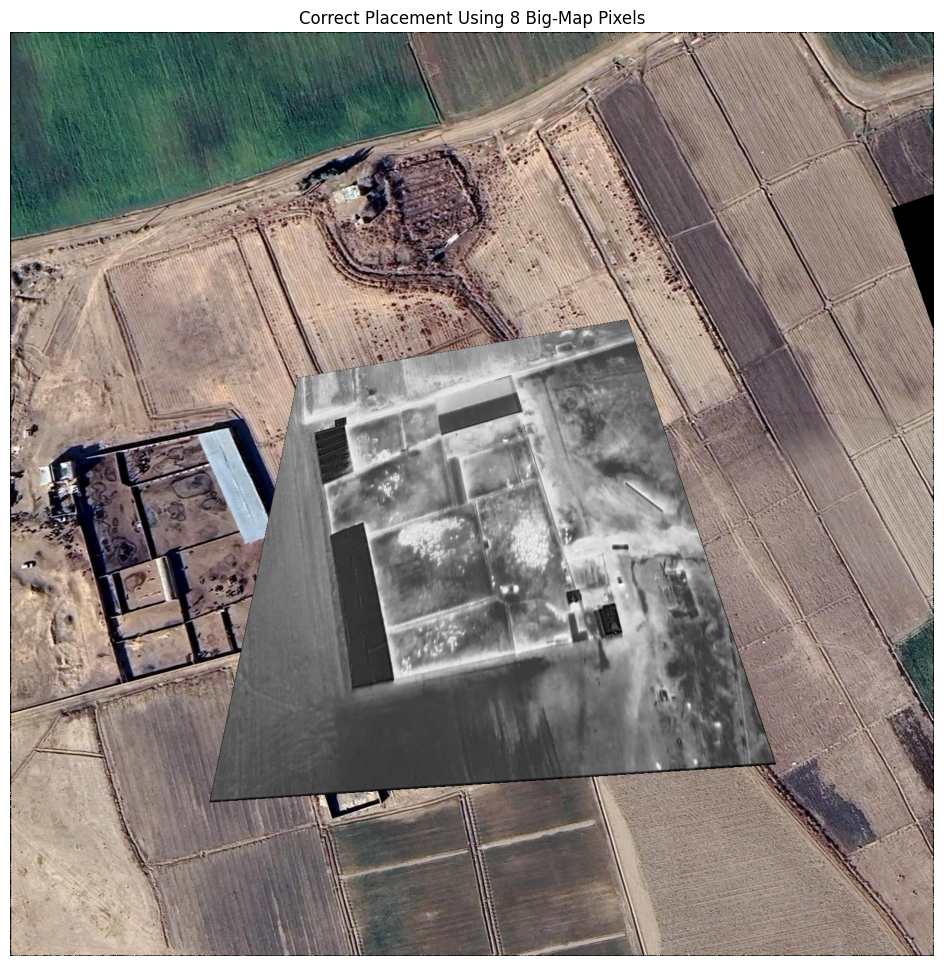

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# ==============================
# 1. Load images
# ==============================
big_map = np.array(Image.open("js_datasets/qomFly2-400m/satellite/tile_1014.png").convert("RGB"))
small_map = np.array(Image.open("js_datasets/qomFly2-400m/thermal/frame_3105.png").convert("RGB"))

# ==============================
# 2. Read 8 numbers from Excel (one row)
# ==============================
df = pd.read_excel("js_excels/predicted_gpu.xlsx")

row = df.iloc[3]


# ==============================
# 3. SOURCE points (small map corners)
# ==============================
h, w, _ = small_map.shape

src_pts = np.array([
    [0, 0],        # top-left
    [w, 0],        # top-right
    [0, h],         # bottom-left
    [w, h],        # bottom-right
], dtype=np.float32)

# ==============================
# 4. DESTINATION points (big map pixels)
# ==============================
dst_pts = np.array([
    [row["x1"], row["y1"]],
    [row["x2"], row["y2"]],
    [row["x3"], row["y3"]],
    [row["x4"], row["y4"]],
], dtype=np.float32)

# ==============================
# 5. Compute homography
# ==============================
H, _ = cv2.findHomography(src_pts, dst_pts)

# ==============================
# 6. Warp small map into big map space
# ==============================
warped_small = cv2.warpPerspective(
    small_map,
    H,
    (big_map.shape[1], big_map.shape[0])
)

# ==============================
# 7. Overlay
# ==============================
mask = np.any(warped_small != [0, 0, 0], axis=2)

result = big_map.copy()
result[mask] = warped_small[mask]

# ==============================
# 8. Visualize
# ==============================
plt.figure(figsize=(12, 12))
plt.imshow(result)
plt.axis("off")
plt.title("Correct Placement Using 8 Big-Map Pixels")
plt.show()
